In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn 
from clustimage import Clustimage

In [3]:
data_imgs = np.load('data/kkanj-imgs.npz')
data_labels = np.load('data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

In [101]:
values, counts = np.unique(labels, return_counts=True)
ind = np.argpartition(-counts, kth=4)[3:4]
print(values[ind])
x = np.where(labels == values[ind])
print(x)
label = x[0]
print(len(label))
images = imgs[label[0]:label[-1]]

['U+4EBA']
(array([13672, 13673, 13674, ..., 15244, 15245, 15246]),)
1575


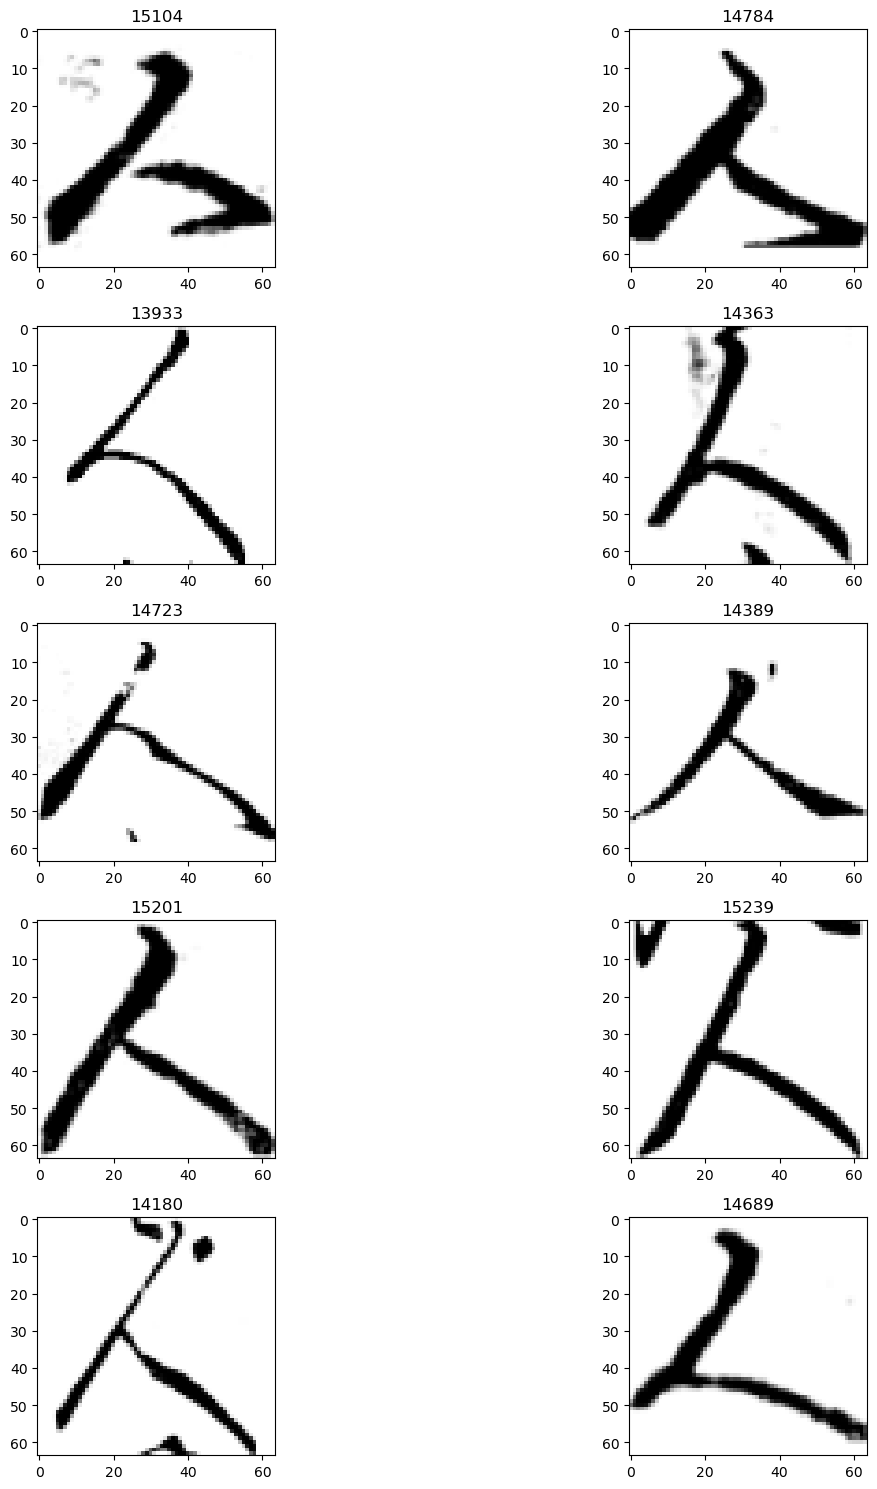

In [102]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l=rn.randint(0,len(label))
        ax[i,j].imshow(images[l], cmap='Greys')
        ax[i,j].set_title(label[l])
        
        
plt.tight_layout()

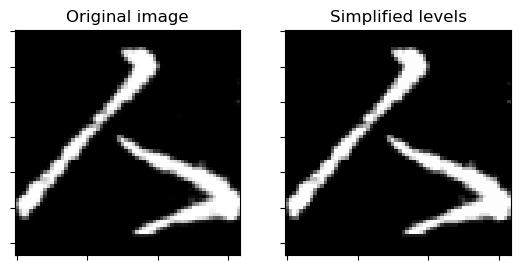

In [103]:
from sklearn import cluster
from skimage import data

def km_clust(array, n_clusters):
    
    X = array.reshape((-1, 1))

    k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
    k_m.fit(X)

    # Get the coordinates of the clusters centres as a 1D array
    values = k_m.cluster_centers_.squeeze()

    # Get the label of each point
    labels = k_m.labels_

    return(values, labels)

# Read the data as greyscale 
img = images[0]

# Group similar grey levels using 8 clusters
values, labels = km_clust(img, n_clusters = 8)

# Create the segmented array from labels and values
img_segm = np.choose(labels, values)
# Reshape the array as the original image
img_segm.shape = img.shape

# Get the values of min and max intensity in the original image
vmin = img.min()
vmax = img.max()

fig = plt.figure(1)
# Plot the original image
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img,cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
ax1.set_title('Original image')

# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_segm, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
ax2.set_title('Simplified levels')

# Get rid of the tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

plt.show()

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


(1574, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 275.12it/s]


(64, 64)


<Figure size 640x480 with 0 Axes>

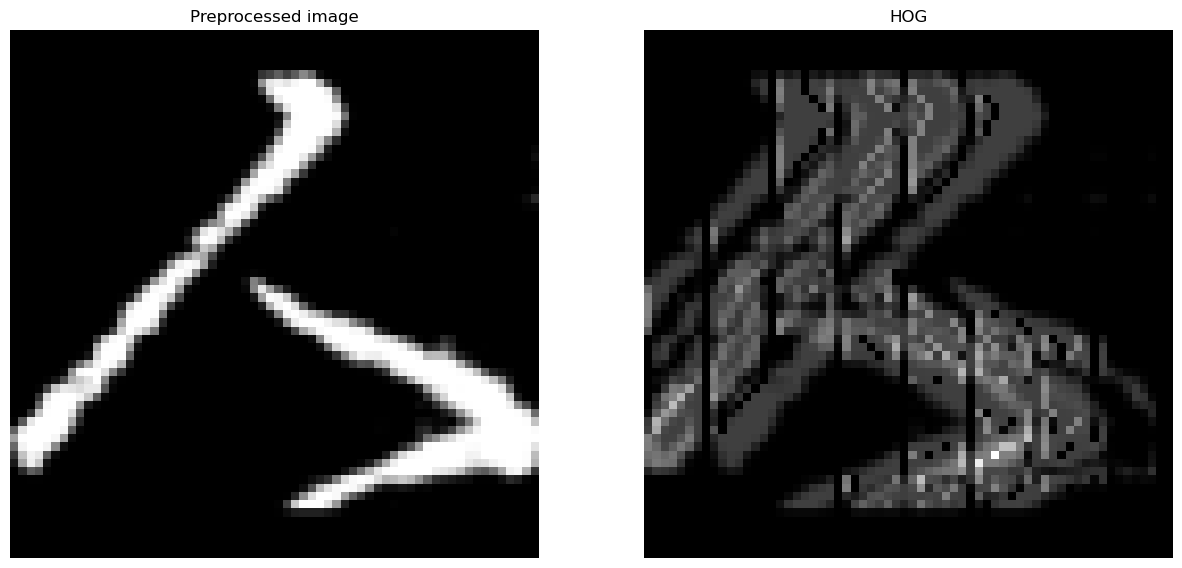

In [100]:
print(images.shape)
cl = Clustimage(method='hog')
img_hog = cl.extract_hog(images[0], pixels_per_cell=(1,1), orientations=4, flatten=True)

plt.figure()
fig,axs=plt.subplots(1,2, figsize=(15,10))
axs[0].imshow(images[0], cmap='gray')
axs[0].axis('off')
axs[0].set_title('Preprocessed image', fontsize=12)
axs[1].imshow(img_hog, cmap='gray')
axs[1].axis('off')
axs[1].set_title('HOG', fontsize=12)
print(np.array(images[0]).shape)